# Final EDA

## 0. Data Load

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import os
os.chdir('/content/drive/MyDrive/기상청/데이터')

In [2]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [3]:
import numpy as np
import pandas as pd
import datetime
from datetime import timedelta
from tqdm.notebook import tqdm
tqdm.pandas()

import random
from functools import reduce

import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
%matplotlib inline

import matplotlib.font_manager as fm
fm._rebuild()
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

/usr/local/lib/python3.7/dist-packages/tqdm/std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [4]:
df_model = pd.read_csv('final_0613.csv', encoding='CP949')
df_eda = pd.read_csv('data.csv', encoding='CP949')
weather = pd.read_csv("weather_final2.csv", encoding="cp949")

In [ ]:
df_model.head(2)

,date,sex,big_cat,sm_cat,qty,ratio,오늘날씨,미세먼지,오늘 비,기상정보,태풍정보,avg_ta,max_ta,min_ta,rn_day,rn_hr1,avg_ws,PM10,PM25,hm_max,sum_ss_hr,max_pa,공휴일여부,주말여부,연_2019,월_2,월_3,월_4,월_5,월_6,월_7,월_8,월_9,월_10,월_11,월_12,분기_2,분기_3,분기_4,요일_1,요일_2,요일_3,요일_4,요일_5,요일_6,계절_1,계절_2,계절_3,age_20,age_30,age_40,age_50
0,2018-01-01,1,식품,가공란,37.0,0.0,10.69387,4.09137,0.0,0.00000,0.04440,0.885198,5.464146,-2.88074,0.0,0.0,2.157094,44.015611,21.477208,61.923313,52.276365,1020.592385,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
1,2018-01-01,1,식품,가공란,16.0,0.0,12.42969,6.35294,0.0,0.51282,0.42417,0.885198,5.464146,-2.88074,0.0,0.0,2.157094,44.015611,21.477208,61.923313,52.276365,1020.592385,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0


In [ ]:
df_eda.head(2)

,date,sex,age,big_cat,sm_cat,qty,cnt
0,20180101,F,20,식품,가공란,37,0.480964
1,20180101,F,30,식품,가공란,16,0.480964


In [8]:
weather.head(2)

,날짜,지점번호,평균기온,최고기온,최저기온,일별강수량,1시간최대강수량,평균풍속,지역,PM10,PM25,1시간최대습도,일조시간합,최고현지기압,연,월,일,분기,요일,공휴일명,공휴일여부,주말여부,계절,체감온도,열지수,폭염여부,강수여부,year,month
0,2018-01-01,105,1.3,5.7,-2.1,0.0,0.0,3.7,강릉,20.066667,13.400000,25.4,57.9,1023.0,2018,1,1,1,0,1월1일,1,0,3,7.502056,-39.701524,0,0,2018,1
1,2018-01-01,112,-0.3,2.7,-2.7,0.0,0.0,1.6,인천,37.518681,18.641758,67.2,53.8,1020.3,2018,1,1,1,0,1월1일,1,0,3,9.992379,-42.924922,0,0,2018,1


In [5]:
df_model['date'] = pd.to_datetime(df_model['date'], format='%Y-%m-%d')
df_eda['date'] = pd.to_datetime(df_eda['date'], format='%Y%m%d')
weather['날짜'] = pd.to_datetime(weather['날짜'], format='%Y-%m-%d')
df_model['year'] = df_model['date'].dt.year
df_model['month'] = df_model['date'].dt.month
df_model['yymm'] = df_model['year'].map(str) + df_model['month'].apply(lambda x: str(x) if x >= 10 else '0'+str(x))

## 1. EDA

* 업종별 차이

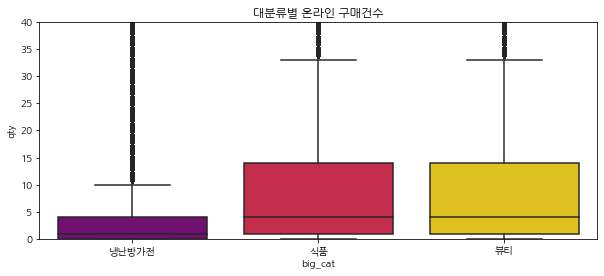

In [ ]:
plt.rcParams["figure.figsize"] = (10,4)
sns.boxplot(x='big_cat', y='qty', data=df_model, palette = ["purple", "crimson", "gold"], order=["냉난방가전","식품","뷰티"])
plt.title('대분류별 온라인 구매건수')
plt.ylim(0,40)
plt.show()

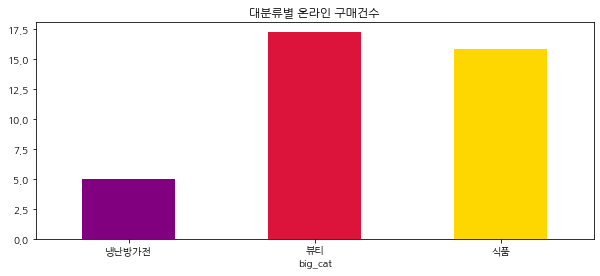

In [ ]:
plt.rcParams["figure.figsize"] = (10,4)
df_model.groupby(['big_cat'])['qty'].mean().plot(kind = 'bar', color = ["purple", "crimson", "gold"])
plt.xticks(rotation=0)
plt.title('대분류별 온라인 구매건수')
plt.show()

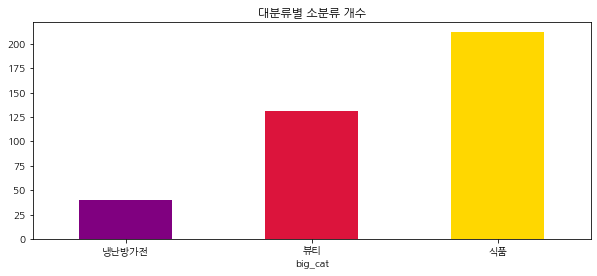

In [ ]:
plt.rcParams["figure.figsize"] = (10,4)
df_model.groupby(['big_cat'])['sm_cat'].nunique().plot(kind = 'bar', color = ["purple", "crimson", "gold"])
plt.xticks(rotation=0)
plt.title('대분류별 소분류 개수')
plt.show()

* 성별 연령별 차이

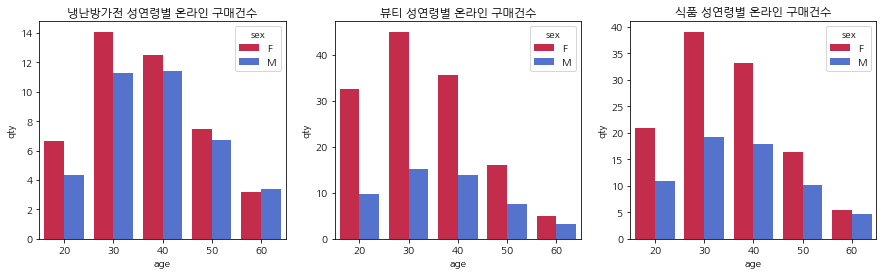

In [ ]:
f, axes = plt.subplots(1, 3)
f.set_size_inches(15,4)
df_plot = df_eda.groupby(['sex', 'age', 'big_cat']).mean().reset_index()[['sex', 'age', 'big_cat', 'qty']]

for i in range(3):
    sns.barplot(x='age', y='qty', hue='sex', data=df_plot[df_plot.big_cat==df_plot.big_cat[i]], ax=axes[i], palette=["crimson","royalblue"])
    axes[i].set_title("{} 성연령별 온라인 구매건수".format(df_plot.big_cat[i]))

* 날씨와 온라인 구매건수

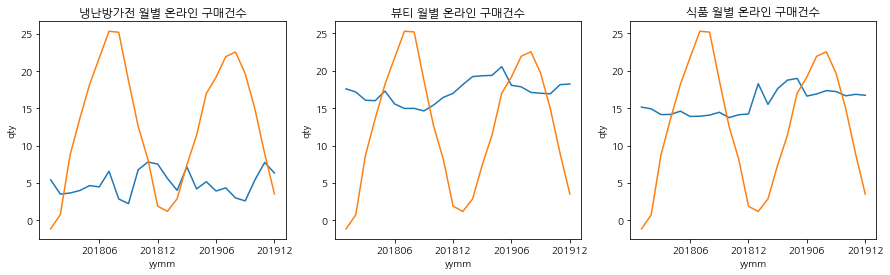

In [ ]:
f, axes = plt.subplots(1, 3)
f.set_size_inches(15,4)
df_plot = df_model.groupby(['yymm','big_cat']).mean().reset_index()[['yymm', 'big_cat', 'qty', 'avg_ta']]

for i in range(3):
    sns.lineplot(x='yymm', y='qty', data=df_plot[df_plot.big_cat==df_plot.big_cat[i]], ax=axes[i])
    sns.lineplot(x='yymm', y='avg_ta', data=df_plot[df_plot.big_cat==df_plot.big_cat[i]], ax=axes[i])
    axes[i].set_title("{} 월별 온라인 구매건수".format(df_plot.big_cat[i]))
    axes[i].set_xticks(['201806','201812','201906','201912'])

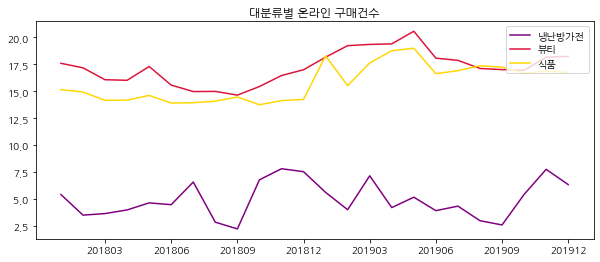

In [14]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.rcParams["figure.figsize"] = (10,4)
plt.plot(df_model[df_model['big_cat']=='냉난방가전'].groupby(['yymm'])['qty'].mean(), color='purple')
plt.plot(df_model[df_model['big_cat']=='뷰티'].groupby(['yymm'])['qty'].mean(), color='crimson')
plt.plot(df_model[df_model['big_cat']=='식품'].groupby(['yymm'])['qty'].mean(), color='gold')
ax.set_xticks(['201803','201806','201809','201812','201903','201906','201909','201912'])
plt.legend(["냉난방가전","뷰티","식품"], loc='upper right')
plt.title('대분류별 온라인 구매건수')
plt.show()

* 예시 소분류

In [28]:
df_model[df_model['big_cat']=='냉난방가전']['sm_cat'].unique()

array(['가스온수기', '가열식 가습기', '공기정화 용품', '공기청정기', '냉풍기', '돈풍기', '라디에이터',
       '벽걸이 에어컨', '벽걸이형 냉온풍기', '보일러', '복합식 가습기', '산림욕기', '스탠드형 냉온풍기',
       '스탠드형 에어컨', '신발건조기', '업소용 선풍기', '에어워셔', '에어커튼', '에어컨 리모컨', '온수매트',
       '온열매트', '온풍기', '의류건조기', '이동형 에어컨', '자연식 가습기', '전기온수기', '전기장판',
       '제습기', '중대형 에어컨', '천장형 에어컨', '초음파식 가습기', '카페트매트', '컨벡터',
       '탁상/USB 선풍기', '황토매트', '휴대용 선풍기', '히터', '멀티형 에어컨', '벽걸이형 선풍기',
       '난방용 열풍기'], dtype=object)

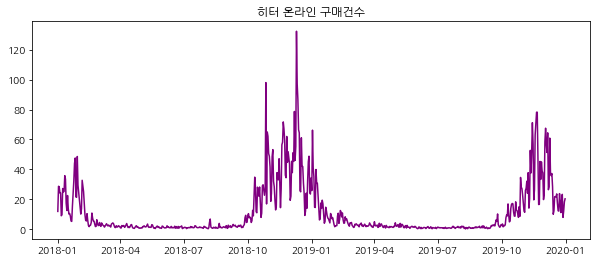

In [30]:
# 겨울
plt.rcParams["figure.figsize"] = (10,4)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.plot(df_model[df_model['sm_cat']=='히터'].groupby(['date'])['qty'].mean(), color='purple')
plt.title('히터 온라인 구매건수')
plt.show()

In [23]:
df_model[df_model['big_cat']=='뷰티']['sm_cat'].unique()

array(['기능성 링클케어 화장품', '기능성 모공관리 화장품', '기능성 아이케어 화장품', '기능성 영양보습 화장품',
       '기능성 트러블케어 화장품', '기능성 화이트닝 화장품', '기능성 화장품 세트', '기초 화장용 로션',
       '기초 화장용 미스트', '기초 화장용 스킨', '기초 화장용 에센스', '기초 화장용 오일/앰플',
       '기초 화장용 크림', '남성 로션', '남성 메이크업', '남성 선케어', '남성 세트', '남성 쉐이빙',
       '남성 스킨', '남성 에센스', '남성 크림', '남성 클렌징', '남성향수', '네일 메이크업 용품',
       '네일관리 소품', '네일리무버', '네일세트', '네일아트', '네일컬러', '네일케어', '데오드란트', '린스',
       '립앤아이 리무버', '메이크업 박스', '메이크업 브러쉬', '미용가위', '바디 보습제', '바디 세트',
       '바디 스크럽', '바디 클렌져', '바디케어용 땀패드', '바디케어용 때비누', '바디케어용 볼륨업크림',
       '바디케어용 슬리밍', '바디케어용 제모제', '바디케어용 청 결제', '베이스 메이크업 세트',
       '베이스 메이크업용 BB크림', '베이스 메이크업용 CC크림', '베이스 메이크업용 가루파우더',
       '베이스 메이크업용 메이크업베이스', '베이스 메이크업용 컨실러', '베이스 메이크업용 쿠션팩트',
       '베이스 메이크업용 트윈케이크', '베이스 메이크업용 파우더팩트', '베이스 메이크업용 파운데이션',
       '베이스 메이크업용 프라이머', '뷰티 눈썹정리도구', '뷰티 속눈썹/쌍꺼풀', '뷰티 손거울', '뷰티 타투',
       '뷰티 헤어캡', '뷰티 화장솜', '뷰티 화장품 공병/케이스', '뷰티용 기름종이', '뷰티용 면봉/귀이개',
       '뷰티용 뷰러', '뷰티용 샤프너', '뷰티용 여드름압출기', '색조 메이크업 립글로스', '

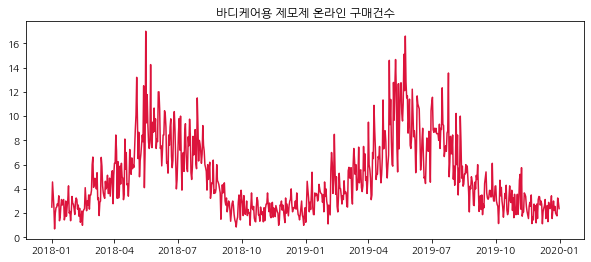

In [25]:
# 여름 직전
plt.rcParams["figure.figsize"] = (10,4)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.plot(df_model[df_model['sm_cat']=='바디케어용 제모제'].groupby(['date'])['qty'].mean(), color='crimson')
plt.title('바디케어용 제모제 온라인 구매건수')
plt.show()

In [26]:
df_model[df_model['big_cat']=='식품']['sm_cat'].unique()

array(['가공란', '가자미', '갈비/찜/바비큐용 돈육', '갈비용 우육', '갈치', '감/홍시', '감귤/한라봉/오렌지',
       '감마리놀렌산 영양제', '감말랭이', '감자', '갓김치', '건강즙', '건강즙/녹용', '건대추', '건망고',
       '건바나나', '건어물 건새우', '건어물 노가리', '건어물 마른오징어', '건어물 멸치', '건어물 쥐포',
       '건어물 진미채', '건어물 황태', '건자두', '건포도', '게장류', '견과류', '견과류 땅콩',
       '견과류 마카다미아', '견과류 밤', '견과류 잣/은행', '견과류 카카오닙스', '견과류 캐슈넛',
       '견과류 피스타치오', '견과류 호두', '계란', '고등어', '고추/피망/파프리카', '곡물차', '곶감/반건시',
       '과실차', '과일류', '과일세트', '과채 음료/주스', '구이/수육용 돈육', '국내산 돈육', '굴 생물',
       '굴비/조기', '글루코사민/키토산 영양제', '기타 농산물', '기타 주스류', '기타 한방/환제품', '김치류',
       '꽃게', '나물', '낙지', '녹차', '느타리버섯', '다이어트보조식', '다이어트용 헬스보충식품',
       '닭 양념육', '닭가슴살', '대게/킹크랩', '더치커피', '도라지/더덕', '돼지 곱창', '두유', '둥굴레차',
       '딸기/복분자/블루베리', '딸기우유', '랍스타', '레몬/자몽', '루테인/눈 영양제', '마/야콘',
       '마늘/생강', '메추리알', '명태/동태', '무/배추', '무김치', '문어', '물김치', '미나리',
       '미숫가루/곡물가루', '믹스 채소', '밀크티/티라떼', '바나나/파인애플/망고', '바나나우유', '반건조고구마',
       '반찬류', '배/포도/과일즙', '배추김치', '백김치', '보리차', '복분자/석류/과실즙', '부추',
       '브로콜리/

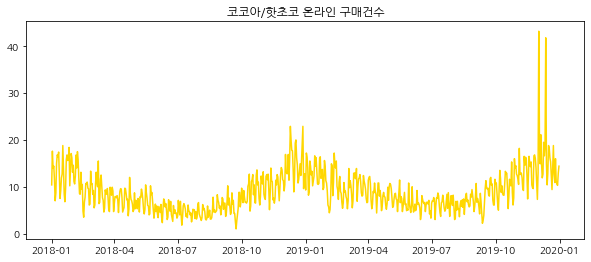

In [27]:
# 겨울
plt.rcParams["figure.figsize"] = (10,4)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.plot(df_model[df_model['sm_cat']=='코코아/핫초코'].groupby(['date'])['qty'].mean(), color='gold')
plt.title('코코아/핫초코 온라인 구매건수')
plt.show()

In [10]:
weather.columns

Index(['날짜', '지점번호', '평균기온', '최고기온', '최저기온', '일별강수량', '1시간최대강수량', '평균풍속', '지역',
       'PM10', 'PM25', '1시간최대습도', '일조시간합', '최고현지기압', '연', '월', '일', '분기', '요일',
       '공휴일명', '공휴일여부', '주말여부', '계절', '체감온도', '열지수', '폭염여부', '강수여부', 'year',
       'month'],
      dtype='object')

In [11]:
weather[['평균기온', '일별강수량', '1시간최대강수량', '평균풍속', 'PM10', 'PM25', '1시간최대습도', '일조시간합', '최고현지기압', '체감온도', '열지수', '폭염여부', '강수여부']].corr()

,평균기온,일별강수량,1시간최대강수량,평균풍속,PM10,PM25,1시간최대습도,일조시간합,최고현지기압,체감온도,열지수,폭염여부,강수여부
평균기온,1.000000,0.126954,0.159097,-0.060778,-0.279956,-0.264054,0.394833,0.050344,-0.744891,0.982369,0.999307,0.401742,0.114467
일별강수량,0.126954,1.000000,0.860405,0.111182,-0.192295,-0.168426,0.221169,-0.355533,-0.144950,0.113989,0.128792,-0.052122,0.445156
1시간최대강수량,0.159097,0.860405,1.000000,0.073920,-0.187323,-0.166135,0.238323,-0.344573,-0.179057,0.147519,0.159971,-0.037941,0.484741
평균풍속,-0.060778,0.111182,0.073920,1.000000,-0.221311,-0.276514,-0.232384,-0.015305,0.035360,-0.218426,-0.062162,-0.055877,0.098817
PM10,-0.279956,-0.192295,-0.187323,-0.221311,1.000000,0.885455,-0.061481,0.126985,0.206015,-0.227517,-0.273393,-0.104230,-0.240399
PM25,-0.264054,-0.168426,-0.166135,-0.276514,0.885455,1.000000,0.012369,0.051930,0.170778,-0.202779,-0.259884,-0.068639,-0.193961
1시간최대습도,0.394833,0.221169,0.238323,-0.232384,-0.061481,0.012369,1.000000,-0.305358,-0.389578,0.429945,0.400935,0.051700,0.424829
일조시간합,0.050344,-0.355533,-0.344573,-0.015305,0.126985,0.051930,-0.305358,1.000000,0.011060,0.045623,0.045151,0.198202,-0.599904
최고현지기압,-0.744891,-0.144950,-0.179057,0.035360,0.206015,0.170778,-0.389578,0.011060,1.000000,-0.728615,-0.741215,-0.289842,-0.204930
체감온도,0.982369,0.113989,0.147519,-0.218426,-0.227517,-0.202779,0.429945,0.045623,-0.728615,1.000000,0.982345,0.390414,0.099510


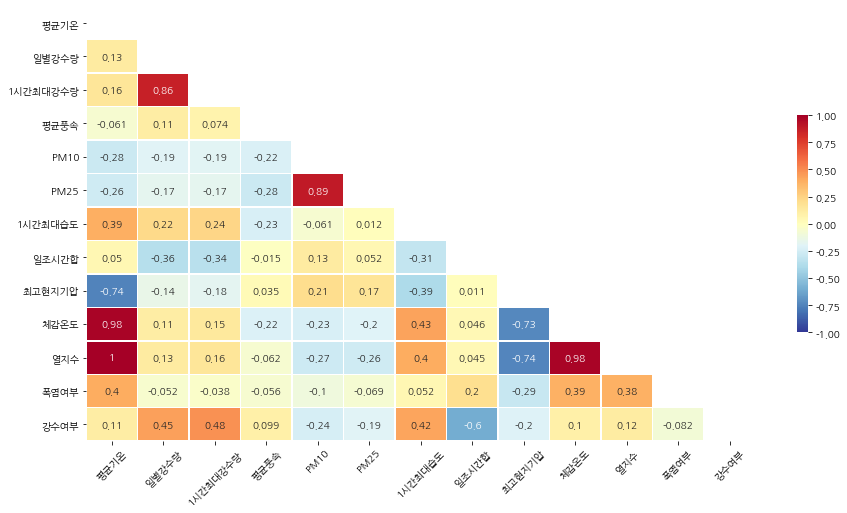

In [7]:
df = weather[['평균기온', '일별강수량', '1시간최대강수량', '평균풍속', 'PM10', 'PM25', '1시간최대습도', '일조시간합', '최고현지기압', '체감온도', '열지수', '폭염여부', '강수여부']].corr()
fig, ax = plt.subplots(figsize=(15, 8))

mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(df, 
            cmap = 'RdYlBu_r', 
            annot = True,   
            mask=mask,     
            linewidths=.5,  
            cbar_kws={"shrink": .5},
            vmin = -1, vmax = 1) 
plt.xticks(rotation=45) 
plt.show()

* 상관관계 절댓값